In [12]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [14]:
CORPUS_PATH=\
'gdrive/MyDrive/Colab Notebooks/MSDS453/FinalProject/parks.csv'
national_parks_corpus = pd.read_csv(CORPUS_PATH)
national_parks_corpus.head()

,park,text
0,Acadia National Park,Acadia National Park is an American national p...
1,Arches National Park,Arches National Park is a national park in eas...
2,Badlands National Park,Badlands National Park (Lakota: Makȟóšiča) is ...
3,Big Bend National Park,Big Bend National Park is an American national...
4,Biscayne National Park,Biscayne National Park is an American national...


In [15]:
national_parks_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   park    63 non-null     object
 1   text    63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [16]:
pd.set_option('display.max_rows', 500)
national_parks_corpus['char_length'] = national_parks_corpus['text'].str.len()
national_parks_corpus

,park,text,char_length
0,Acadia National Park,Acadia National Park is an American national p...,46957
1,Arches National Park,Arches National Park is a national park in eas...,16175
2,Badlands National Park,Badlands National Park (Lakota: Makȟóšiča) is ...,19424
3,Big Bend National Park,Big Bend National Park is an American national...,23315
4,Biscayne National Park,Biscayne National Park is an American national...,49014
5,Black Canyon of the Gunnison National Park,Black Canyon of the Gunnison National Park is ...,17075
6,Bryce Canyon National Park,Bryce Canyon National Park () is an American n...,18531
7,Canyonlands National Park,Canyonlands National Park is an American natio...,18483
8,Capitol Reef National Park,Capitol Reef National Park is an American nati...,21180
9,Carlsbad Caverns National Park,Carlsbad Caverns National Park is an American ...,17978


In [18]:
remove = {'Yellowstone National Park': 'Whittlesey, Lee H. (2002), "Native Americans, the Earliest Interpreters: What is Known About Their Legends and Stories of Yellowstone National Park and the Complexities of Interpreting Them"',
          'Mesa Verde National Park': 'Media related to Mesa Verde National Park at Wikimedia Commons (image gallery)List of national parks of the United StatesList of prehistoric sites in ColoradoNational monuments with ruins/cliff dwellings',
          'Grand Teton National Park': """Outline of Grand Teton National ParkList of national parks of the United StatesJackson Hole Economic SymposiumOfficial website Grand Teton AssociationGrand Teton National Park at Curlie""",
          'Everglades National Park': 'List of birds of Everglades National ParkList of national parks of the United StatesDry Tortugas National ParkEnvironmental Impact of the Big Cypress Swamp JetportNike Missile Site HM-69World Heritage Sites',
          'Joshua Tree National Park': 'CahuillaCalifornia Desert Protection Act of 1994ChemehueviEureka PeakJohnny LangList of national parks of the United States',
          'Zion National Park': 'List of national parks of the United StatesNational Register of Historic Places'}

for park, remove_str in remove.items():
  park_text = national_parks_corpus.loc[national_parks_corpus['park'] == park, 'text'].iloc[0]
  print(park_text)
  search = re.search(remove_str[:15], park_text)
  print(search)
  if search:
      national_parks_corpus.loc[national_parks_corpus['park'] == park, 'text'] = national_parks_corpus.loc[national_parks_corpus['park'] == park, 'text'].str[0:search.span()[0]]
  else:
      print(f"{park} not found")

Yellowstone National Park is a national park located in the western United States, largely in the northwest corner of Wyoming and extending into Montana and Idaho. It was established by the 42nd U.S. Congress with the Yellowstone National Park Protection Act and signed into law by President Ulysses S. Grant on March 1, 1872. Yellowstone was the first national park in the U.S. and is also widely held to be the first national park in the world. The park is known for its wildlife and its many geothermal features, especially the Old Faithful geyser, one of its most popular. While it represents many types of biomes, the subalpine forest is the most abundant. It is part of the South Central Rockies forests ecoregion.While Native Americans have lived in the Yellowstone region for at least 11,000 years, aside from visits by mountain men during the early-to-mid-19th century, organized exploration did not begin until the late 1860s. Management and control of the park originally fell under the ju

In [19]:
national_parks_corpus

,park,text,char_length
0,Acadia National Park,Acadia National Park is an American national p...,46957
1,Arches National Park,Arches National Park is a national park in eas...,16175
2,Badlands National Park,Badlands National Park (Lakota: Makȟóšiča) is ...,19424
3,Big Bend National Park,Big Bend National Park is an American national...,23315
4,Biscayne National Park,Biscayne National Park is an American national...,49014
5,Black Canyon of the Gunnison National Park,Black Canyon of the Gunnison National Park is ...,17075
6,Bryce Canyon National Park,Bryce Canyon National Park () is an American n...,18531
7,Canyonlands National Park,Canyonlands National Park is an American natio...,18483
8,Capitol Reef National Park,Capitol Reef National Park is an American nati...,21180
9,Carlsbad Caverns National Park,Carlsbad Caverns National Park is an American ...,17978


In [20]:
national_parks_corpus['token_lengths'] = national_parks_corpus['text'].apply(lambda x: len(str(x).split(' ')))
national_parks_corpus

,park,text,char_length,token_lengths
0,Acadia National Park,Acadia National Park is an American national p...,46957,7341
1,Arches National Park,Arches National Park is a national park in eas...,16175,2536
2,Badlands National Park,Badlands National Park (Lakota: Makȟóšiča) is ...,19424,3049
3,Big Bend National Park,Big Bend National Park is an American national...,23315,3722
4,Biscayne National Park,Biscayne National Park is an American national...,49014,7817
5,Black Canyon of the Gunnison National Park,Black Canyon of the Gunnison National Park is ...,17075,2897
6,Bryce Canyon National Park,Bryce Canyon National Park () is an American n...,18531,3001
7,Canyonlands National Park,Canyonlands National Park is an American natio...,18483,2951
8,Capitol Reef National Park,Capitol Reef National Park is an American nati...,21180,3315
9,Carlsbad Caverns National Park,Carlsbad Caverns National Park is an American ...,17978,2912


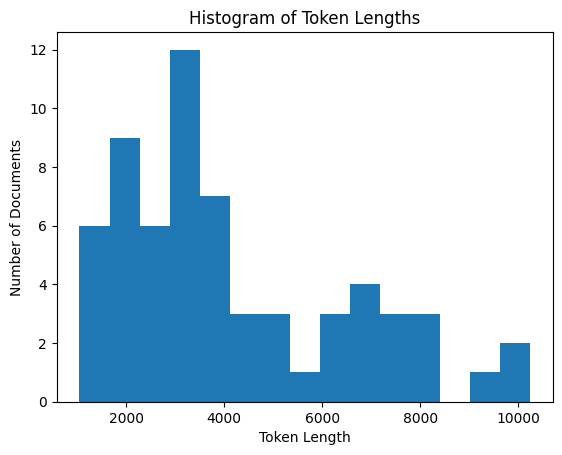

In [21]:
plt.hist(national_parks_corpus['token_lengths'], bins=15)
plt.title(f'Histogram of Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Number of Documents')
plt.show()

In [22]:
national_parks_corpus.to_csv('gdrive/MyDrive/Colab Notebooks/MSDS453/FinalProject/parks_clean.csv', index=False)

In [23]:
pd.read_csv('gdrive/MyDrive/Colab Notebooks/MSDS453/FinalProject/parks_clean.csv')

,park,text,char_length,token_lengths
0,Acadia National Park,Acadia National Park is an American national p...,46957,7341
1,Arches National Park,Arches National Park is a national park in eas...,16175,2536
2,Badlands National Park,Badlands National Park (Lakota: Makȟóšiča) is ...,19424,3049
3,Big Bend National Park,Big Bend National Park is an American national...,23315,3722
4,Biscayne National Park,Biscayne National Park is an American national...,49014,7817
5,Black Canyon of the Gunnison National Park,Black Canyon of the Gunnison National Park is ...,17075,2897
6,Bryce Canyon National Park,Bryce Canyon National Park () is an American n...,18531,3001
7,Canyonlands National Park,Canyonlands National Park is an American natio...,18483,2951
8,Capitol Reef National Park,Capitol Reef National Park is an American nati...,21180,3315
9,Carlsbad Caverns National Park,Carlsbad Caverns National Park is an American ...,17978,2912
